In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

In [3]:
with open('input.txt') as inp:
    in_image = inp.read()
width, height = (25, 6)

In [4]:
def array_from_image(image):
    return np.array([int(i) for i in image])
    
    
def parse_image(image, width, height):
    im_array = array_from_image(image)
    n_layers = int(len(im_array)/height/width)
    
    layers = np.reshape(im_array, (n_layers, height, width))
    return layers

## Part I

In [ ]:
test_image = '123456789012'
width, height = (3, 2)

In [5]:
layers = parse_image(in_image, width, height)

In [6]:
fewest_zeros = np.inf

for layer in layers:
    unique, counts = np.unique(layer, return_counts=True)
    count_dict = dict(zip(unique, counts))
    n_zeros = count_dict[0]
    if n_zeros < fewest_zeros:
        fewest_zeros = n_zeros
        good_layer_dict = count_dict

print(good_layer_dict[1]*good_layer_dict[2])

1935


## Part II

In [ ]:
test_image = '0222112222120000'
width, height = (2, 2)
layers = parse_image(test_image, width, height)

In [ ]:
layers = parse_image(in_image, width, height)

In [7]:
def determine_pixel(array):
    # the first element that is not transparent
    return array[array != 2][0]

In [8]:
decoded_image = -1*np.ones((height, width))
for i in range(width):
    for j in range(height):
        decoded_image[j, i] = determine_pixel(layers[:, j, i])
decoded_image

array([[0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1.,
        0., 0., 1., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
        0., 0., 1., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
        0., 0., 1., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
        0., 0., 1., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
        0., 0., 1., 0., 1., 0., 0., 0., 0.],
       [0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0.,
        1., 1., 0., 0., 1., 1., 1., 1., 0.]])

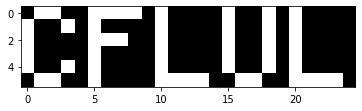

In [10]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

fig = plt.figure()
ax = plt.axes()
ax.imshow(decoded_image, interpolation='nearest', cmap=cm.Greys_r)